### Библиотеки и датасет

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, r2_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.decomposition import PCA

# Загрузка датасета из UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')

X = wine_data.drop(columns='quality')
y_classification = wine_data['quality']
y_regression = wine_data['alcohol']  # Используем содержание алкоголя для регрессии

### Разделение выборок

In [2]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.3, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.3, random_state=42)

### Обучение моделей

In [3]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train_cls, y_train_cls)

gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train_reg, y_train_reg)


GradientBoostingRegressor(random_state=42)

### Оценка качества моделей

In [4]:
y_pred_cls = gb_classifier.predict(X_test_cls)
classification_accuracy = accuracy_score(y_test_cls, y_pred_cls)
print("Accuracy (Classification):", classification_accuracy)
print("Classification Report:\n", classification_report(y_test_cls, y_pred_cls))

y_pred_reg = gb_regressor.predict(X_test_reg)
regression_mse = mean_squared_error(y_test_reg, y_pred_reg)
regression_r2 = r2_score(y_test_reg, y_pred_reg)
print("MSE (Regression):", regression_mse)
print("R2 Score (Regression):", regression_r2)


Accuracy (Classification): 0.63125
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.40      0.12      0.18        17
           5       0.70      0.75      0.73       195
           6       0.61      0.65      0.63       200
           7       0.55      0.39      0.46        61
           8       0.25      0.17      0.20         6

    accuracy                           0.63       480
   macro avg       0.42      0.35      0.37       480
weighted avg       0.62      0.63      0.62       480

MSE (Regression): 9.655618932043205e-05
R2 Score (Regression): 0.9999170969676827


### Стандартизация данных

In [5]:
scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)


### Подбор гиперпараметров

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid_cls = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2]}
grid_search_cls = GridSearchCV(GradientBoostingClassifier(), param_grid_cls, cv=5, scoring='accuracy')
grid_search_cls.fit(X_train_cls_scaled, y_train_cls)

param_grid_reg = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2]}
grid_search_reg = GridSearchCV(GradientBoostingRegressor(), param_grid_reg, cv=5, scoring='neg_mean_squared_error')
grid_search_reg.fit(X_train_reg_scaled, y_train_reg)

best_gb_classifier = grid_search_cls.best_estimator_
best_gb_regressor = grid_search_reg.best_estimator_

best_gb_classifier.fit(X_train_cls_scaled, y_train_cls)
best_gb_regressor.fit(X_train_reg_scaled, y_train_reg)


GradientBoostingRegressor(learning_rate=0.2, n_estimators=200)

### Оценка улучшенных моделей

In [7]:
y_pred_cls_best = best_gb_classifier.predict(X_test_cls_scaled)
best_classification_accuracy = accuracy_score(y_test_cls, y_pred_cls_best)
print("Improved Accuracy (Classification):", best_classification_accuracy)
print("Improved Classification Report:\n", classification_report(y_test_cls, y_pred_cls_best))

y_pred_reg_best = best_gb_regressor.predict(X_test_reg_scaled)
best_regression_mse = mean_squared_error(y_test_reg, y_pred_reg_best)
best_regression_r2 = r2_score(y_test_reg, y_pred_reg_best)
print("Improved MSE (Regression):", best_regression_mse)
print("Improved R2 Score (Regression):", best_regression_r2)


Improved Accuracy (Classification): 0.6541666666666667
Improved Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.06      0.11        17
           5       0.72      0.76      0.74       195
           6       0.62      0.67      0.64       200
           7       0.61      0.51      0.55        61
           8       0.25      0.17      0.20         6

    accuracy                           0.65       480
   macro avg       0.53      0.36      0.37       480
weighted avg       0.67      0.65      0.65       480

Improved MSE (Regression): 0.000139958435438617
Improved R2 Score (Regression): 0.999879831849435


### Визуализация результатов

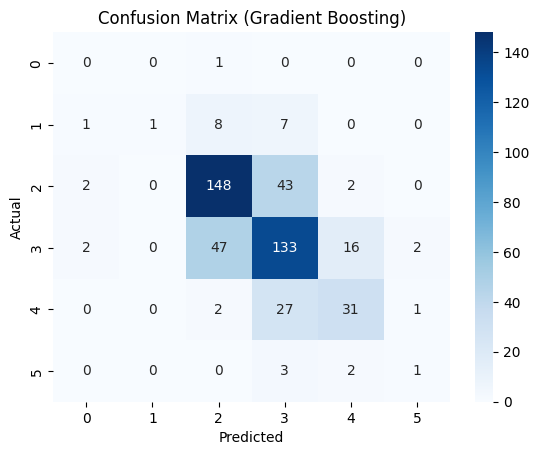

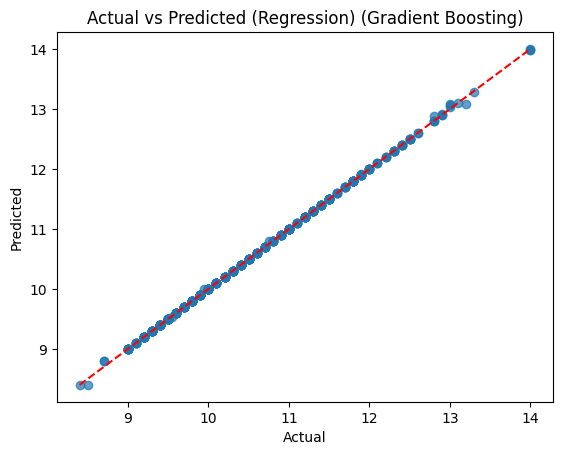

In [8]:
conf_matrix = confusion_matrix(y_test_cls, y_pred_cls_best)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Gradient Boosting)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# График реальных и предсказанных значений для регрессии
plt.scatter(y_test_reg, y_pred_reg_best, alpha=0.7)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.title("Actual vs Predicted (Regression) (Gradient Boosting)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


### Имплементация градиентного бустинга вручную

In [83]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

# Реализация градиентного бустинга
class CustomGradientBoostingRegressor:
    def __init__(self, n_estimators=10, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None
    
    def fit(self, X, y):
        # Инициализация предсказания (среднее значение по target)
        self.initial_prediction = np.mean(y)
        F_0 = np.full_like(y, self.initial_prediction)
        
        # Вектор остатков
        residuals = y - F_0
        
        # Градиентный бустинг: строим последовательность моделей
        for _ in range(self.n_estimators):
            # Обучаем модель на остатках
            model = DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(X, residuals)
            
            # Получаем предсказания от текущей модели
            predictions = model.predict(X)
            
            # Обновляем предсказания с учетом learning_rate
            F_0 += self.learning_rate * predictions
            
            # Сохраняем модель
            self.models.append(model)
            
            # Пересчитываем остатки
            residuals = y - F_0

    def fit_cls(self, X, y):
        # Инициализация предсказания (среднее значение по target)
        self.initial_prediction = np.mean(y)
        F_0 = np.full_like(y, self.initial_prediction)
        
        # Вектор остатков
        residuals = y - F_0
        
        # Градиентный бустинг: строим последовательность моделей
        for _ in range(self.n_estimators):
            # Обучаем модель на остатках
            model = DecisionTreeClassifier(max_depth=self.max_depth)
            model.fit(X, residuals)
            
            # Получаем предсказания от текущей модели
            predictions = model.predict(X)
            
            # Обновляем предсказания с учетом learning_rate
            F_0 += (self.learning_rate * predictions).astype(int)
            
            # Сохраняем модель
            self.models.append(model)
            
            # Пересчитываем остатки
            residuals = y - F_0
    
    def predict(self, X):
        # Начальное предсказание
        F_0 = np.full((X.shape[0],), self.initial_prediction)
        
        # Суммируем предсказания всех моделей
        for model in self.models:
            predictions = model.predict(X)
            F_0 += self.learning_rate * predictions
        
        return F_0

### Обучение и результаты

Manual Gradient Boosting MSE (Regression): 0.4231849299088328
Manual Gradient Boosting R2 Score (Regression): 0.6366539093213787


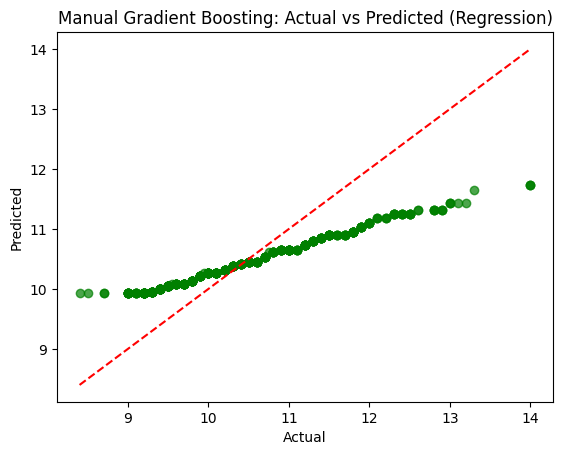

Manual Gradient Boosting Accuracy (Classification): 0.4166666666666667


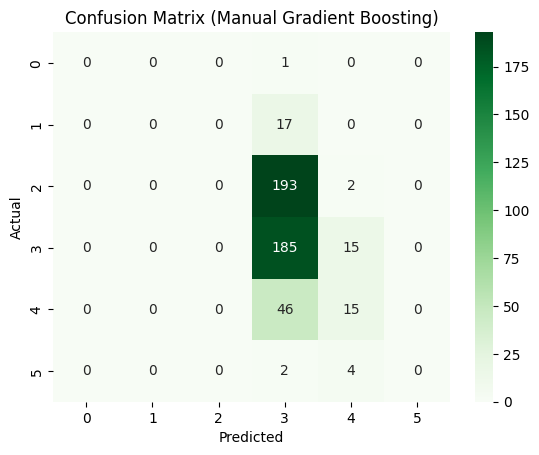

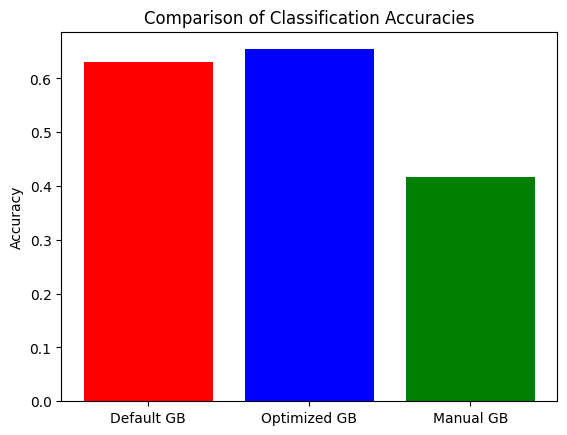

In [85]:
gb_regressor_manual = CustomGradientBoostingRegressor(n_estimators=5, learning_rate=0.1, max_depth=3)
gb_regressor_manual.fit(X_train_reg_scaled, y_train_reg)

# Прогнозирование и оценка результатов для регрессии
y_pred_reg_manual = gb_regressor_manual.predict(X_test_reg_scaled)
manual_regression_mse = mean_squared_error(y_test_reg, y_pred_reg_manual)
manual_regression_r2 = r2_score(y_test_reg, y_pred_reg_manual)

print("Manual Gradient Boosting MSE (Regression):", manual_regression_mse)
print("Manual Gradient Boosting R2 Score (Regression):", manual_regression_r2)

# Визуализация результатов для регрессии
plt.scatter(y_test_reg, y_pred_reg_manual, alpha=0.7, color='green')
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.title("Manual Gradient Boosting: Actual vs Predicted (Regression)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Классификация
# Здесь мы будем использовать регрессионный алгоритм для классификации через преобразование в числовые метки
# Обучение модели для классификации
gb_classifier_manual = CustomGradientBoostingRegressor(n_estimators=5, learning_rate=0.1, max_depth=3)
gb_classifier_manual.fit_cls(X_train_cls_scaled, y_train_cls)
# Прогнозирование и оценка для классификации (округление до целых чисел)
y_pred_cls_manual = gb_classifier_manual.predict(X_test_cls_scaled)
y_pred_cls_manual = np.round(y_pred_cls_manual).astype(int)

from sklearn.metrics import accuracy_score, classification_report

classification_accuracy_manual = accuracy_score(y_test_cls, y_pred_cls_manual)
print("Manual Gradient Boosting Accuracy (Classification):", classification_accuracy_manual)
# print("Manual Gradient Boosting Classification Report:\n", classification_report(y_test_cls, y_pred_cls_manual))

# Матрица ошибок для классификации
conf_matrix_manual = confusion_matrix(y_test_cls, y_pred_cls_manual)
sns.heatmap(conf_matrix_manual, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Manual Gradient Boosting)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Визуализация сравнения точности классификации
accuracies = [classification_accuracy, best_classification_accuracy, classification_accuracy_manual]
labels = ['Default GB','Optimized GB','Manual GB']
plt.bar(labels, accuracies, color=['red','blue','green'])
plt.title("Comparison of Classification Accuracies")
plt.ylabel("Accuracy")
plt.show()